# **FurFlix🐱🐶: Classifying Cats and Dogs with CNN🐱🆚🐶**

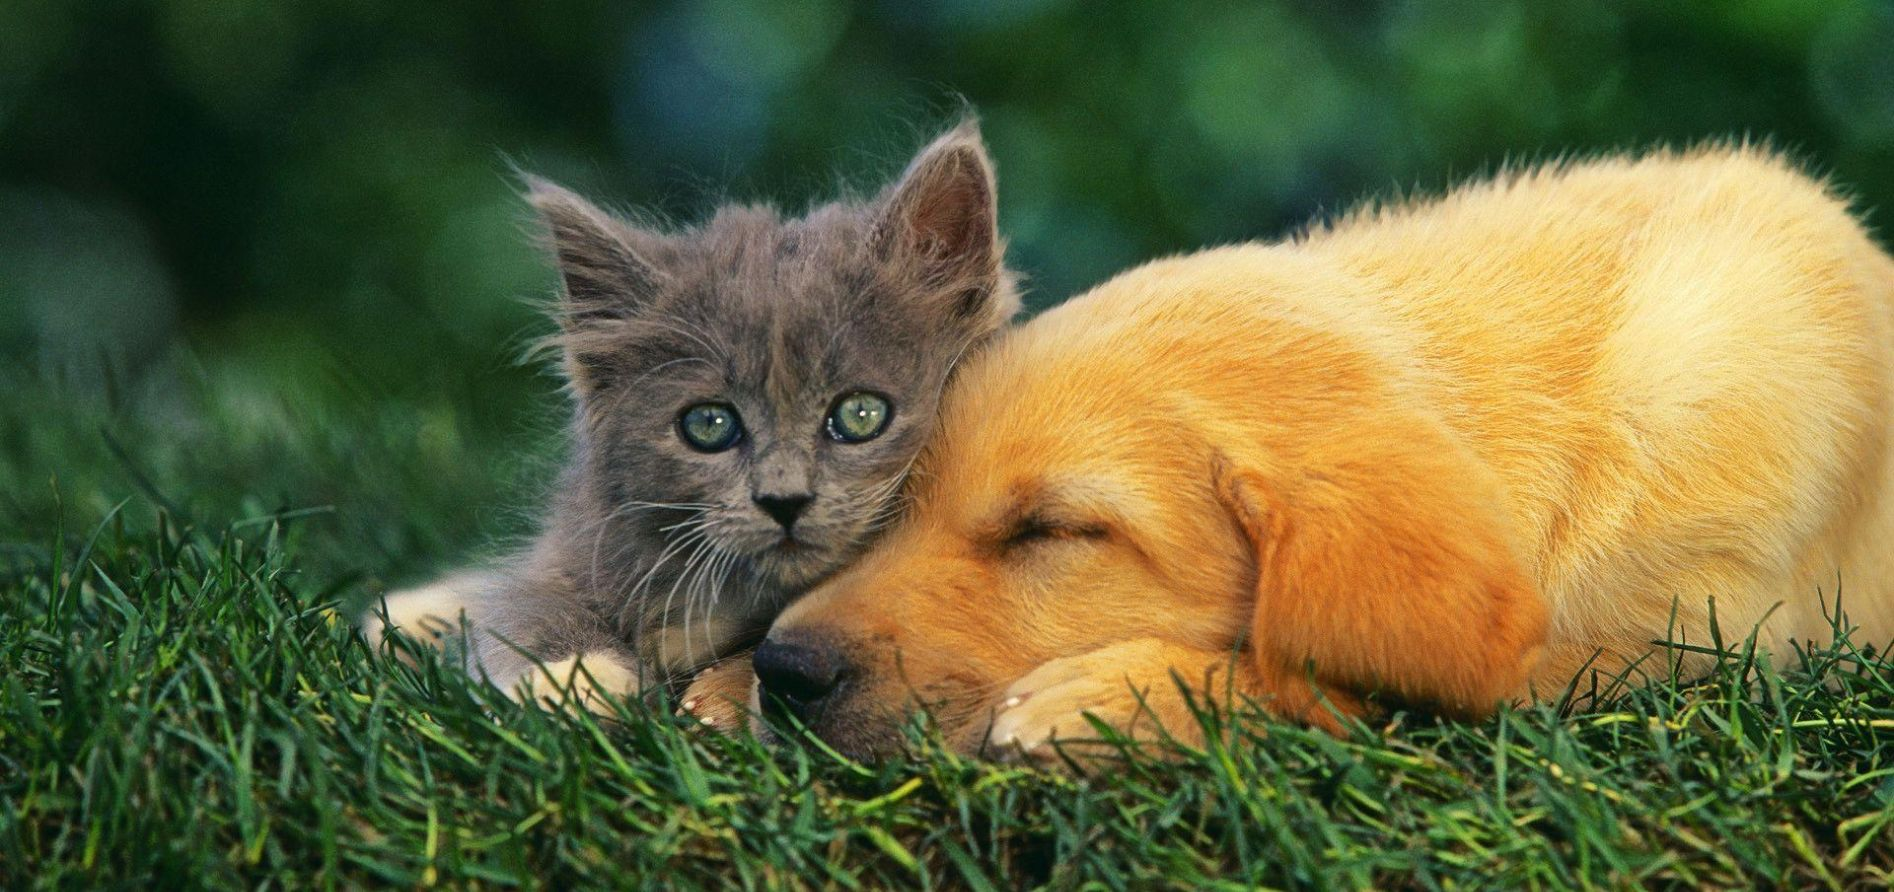

#### **Unleash the power of AI to settle the age-old debate: Are you a cat person or a dog person? 🐱🆚🐶💪**

# **Importing the Required Libraries**

In [21]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import cv2

# **Use Keras Generators Function - Batch Size - Data Splitting**

In [3]:
# generators for train data
train_df = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train', 
    labels = 'inferred', 
    label_mode = 'int', 
    batch_size = 32, 
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [4]:
# generators for test data
test_df = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test', 
    labels = 'inferred', 
    label_mode = 'int', 
    batch_size = 32, 
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


# **Normalize the Image Values - Range Between (0 to 1)**

In [5]:
# normalize the image values from 0 to 255 into range between 0 & 1
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

# function call
train_df = train_df.map(process)
test_df = test_df.map(process)

# **CNN - Model Building - Image Classification**

In [13]:
# let's build the model
model = Sequential()

# first layer
model.add(Conv2D(32,kernel_size =(3, 3),padding ='valid',activation ='relu',input_shape =(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2, 2),strides = 2, padding ='valid'))

# 2nd layer
model.add(Conv2D(64,kernel_size =(3, 3),padding ='valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2, 2),strides = 2, padding ='valid'))

# 3rd layer
model.add(Conv2D(128,kernel_size =(3, 3),padding ='valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2, 2),strides = 2, padding ='valid'))

# Flatten Layer
model.add(Flatten())
               
# Hidden layers                 
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

# **Model - Summary**

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

# **Model Compilation**

In [15]:
# compile the model
model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics=['accuracy'])

# **Model - Fitting - Train - Validation - History**

In [16]:
# history
history = model.fit(train_df, epochs = 10, validation_data = test_df)

Epoch 1/10
625/625 [==============================] - 82s 125ms/step - loss: 1.4474 - accuracy: 0.6080 - val_loss: 0.5860 - val_accuracy: 0.6962
Epoch 2/10
625/625 [==============================] - 74s 117ms/step - loss: 0.5605 - accuracy: 0.7128 - val_loss: 0.5516 - val_accuracy: 0.7254
Epoch 3/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4833 - accuracy: 0.7667 - val_loss: 0.4743 - val_accuracy: 0.7784
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4341 - accuracy: 0.7995 - val_loss: 0.4599 - val_accuracy: 0.7828
Epoch 5/10
625/625 [==============================] - 76s 120ms/step - loss: 0.3791 - accuracy: 0.8282 - val_loss: 0.5167 - val_accuracy: 0.7250
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3105 - accuracy: 0.8638 - val_loss: 0.4294 - val_accuracy: 0.8108
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.2417 - accuracy: 0.8989 - val_loss: 0.6692 - val_ac

# **Plot the Loss and Accuracy of Train and Test Data Both**

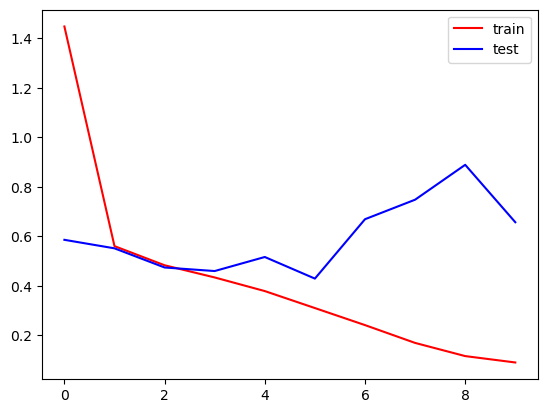

In [17]:
# loss plots
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

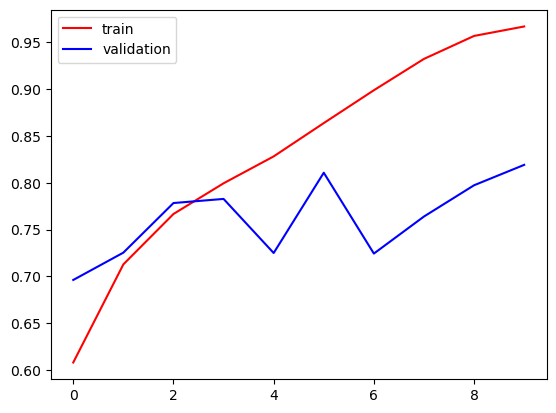

In [18]:
# accuracy plots
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

# **Model - Prediction - Test - Dataset**

# **Cat Image Prediction**

In [53]:
# cat - read image using opencv 
cat_test_data = cv2.imread('/kaggle/input/dogs-vs-cats/test/cats/cat.10030.jpg')

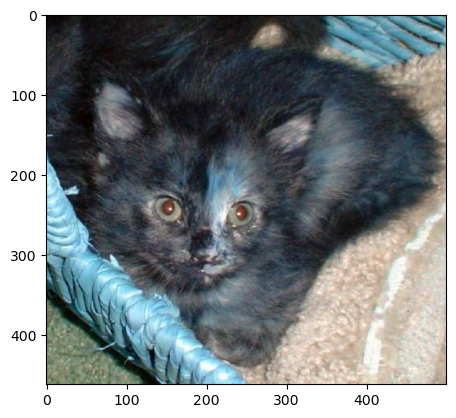

In [54]:
# plot the image
plt.imshow(cat_test_data)

In [55]:
# shape of image
cat_test_data.shape

(462, 500, 3)

In [56]:
# resize image using opencv for prediction
cat_img_resize = cv2.resize(cat_test_data, (256, 256))

In [57]:
# reshape the cat image
cat_img = cat_img_resize.reshape((1, 256, 256, 3))

In [58]:
# model prediction on test dataset. 1 is dog and 0 is cat
model.predict(cat_img)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

# **Dog Image Prediction**

In [60]:
# cat - read image using opencv 
dog_test_data = cv2.imread('/kaggle/input/dogs-vs-cats/test/dogs/dog.100.jpg')

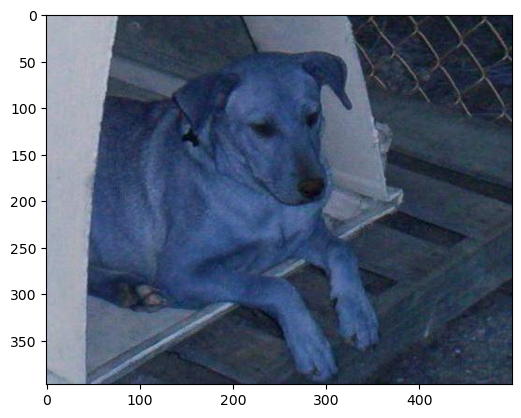

In [61]:
# plot the image
plt.imshow(dog_test_data)

In [62]:
# shape of image
dog_test_data.shape

(397, 500, 3)

In [63]:
# resize image using opencv for prediction
dog_img_resize = cv2.resize(dog_test_data, (256, 256))

In [64]:
# reshape the dog image
dog_img = dog_img_resize.reshape((1, 256, 256, 3))

In [65]:
# model prediction on test dataset. 1 is dog and 0 is cat
model.predict(dog_img)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

# **Thanks for Reading and Visiting my Notebook**